In [9]:
from mnist import load_mnist
import matplotlib.pyplot as plt
import numpy as np
# 加载MNIST数据集
train, validation, test = load_mnist()

Extracting MNIST-data\train-images-idx3-ubyte.gz
Extracting MNIST-data\train-labels-idx1-ubyte.gz
Extracting MNIST-data\t10k-images-idx3-ubyte.gz
Extracting MNIST-data\t10k-labels-idx1-ubyte.gz


In [10]:
type(train)

tuple

In [11]:
len(train)

2

In [12]:
train[1]

array([7, 3, 4, ..., 5, 6, 8], dtype=uint8)

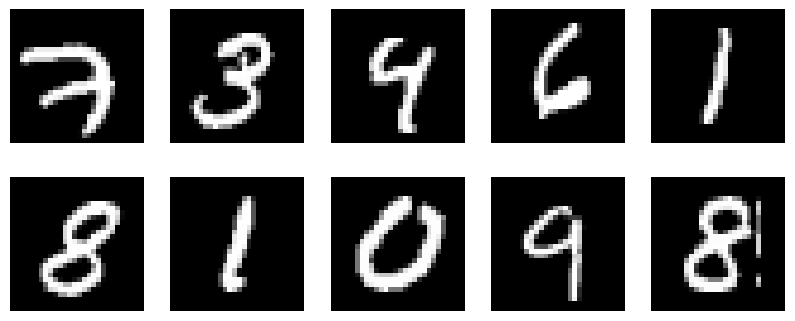

In [13]:
# 提取训练集图像和标签
X_train, y_train = train[0], train[1]

# 提取验证集图像和标签
X_val, y_val = validation[0], validation[1]

# 提取测试集图像和标签
X_test, y_test = test[0], test[1]

# 绘制一些样本图像
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(10, 4))
for ax, img in zip(axes.flatten(), X_train[:10]):
    ax.imshow(img.reshape((28, 28)), cmap='gray')
    ax.axis('off')
plt.show()

In [14]:
import numpy as np
import matplotlib.pyplot as plt

class my_PCA:
    def __init__(self, n_components):
        self.n_components = n_components
        self.mean = None
        self.components = None
        self.explained_variance = None
    
    def fit(self, X):
        # 展平数据
        X_flattened = X.reshape(X.shape[0], -1)
        
        # 检查数据维度
        assert X_flattened.ndim == 2, "Data must be 2D after flattening"
        
        # 中心化数据
        self.mean = np.mean(X_flattened, axis=0)
        X_centered = X_flattened - self.mean
        
        # 使用 SVD 计算特征向量和特征值
        U, S, Vt = np.linalg.svd(X_centered, full_matrices=False)
        
        # 避免溢出
        S = np.clip(S, a_min=0, a_max=np.inf)
        
        self.components = Vt[:self.n_components]
        self.explained_variance = S**2 / (X_flattened.shape[0] - 1)
    
    def transform(self, X):
        X_flattened = X.reshape(X.shape[0], -1)
        X_centered = X_flattened - self.mean
        return np.dot(X_centered, self.components.T)

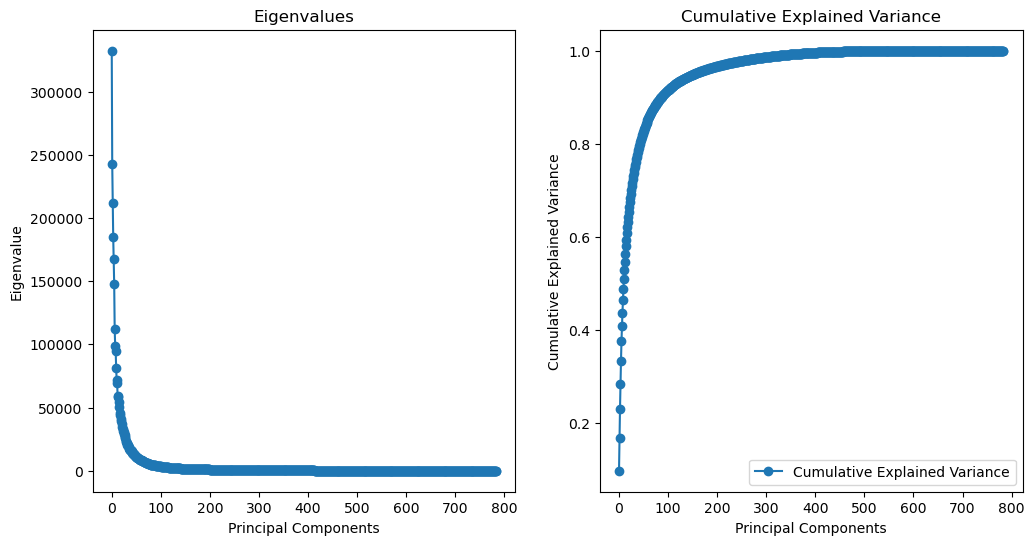

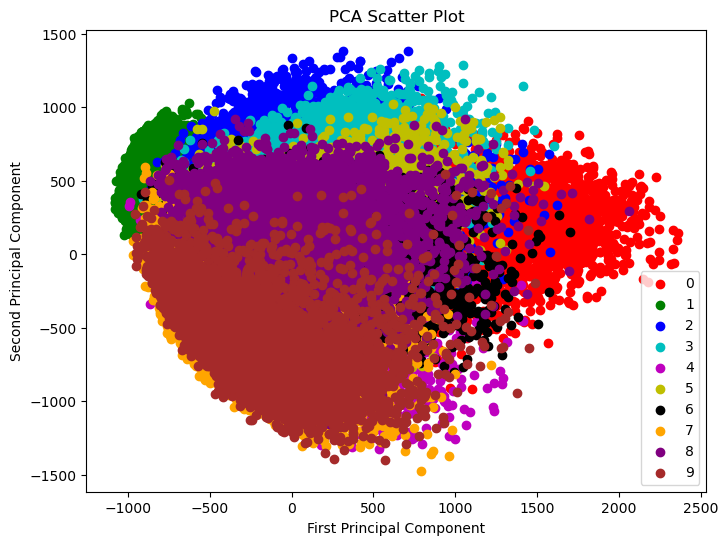

In [15]:
# 实例化 PCA 对象
pca = my_PCA(n_components=15)
pca.fit(X_train)

# 变换数据到主成分空间
X_train_pca = pca.transform(X_train)

# 绘制特征值及其累积贡献率
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(pca.explained_variance, 'o-', label='Eigenvalues')
plt.title('Eigenvalues')
plt.xlabel('Principal Components')
plt.ylabel('Eigenvalue')

plt.subplot(1, 2, 2)
cumulative_variance = np.cumsum(pca.explained_variance) / np.sum(pca.explained_variance)
plt.plot(cumulative_variance, 'o-', label='Cumulative Explained Variance')
plt.title('Cumulative Explained Variance')
plt.xlabel('Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.legend()
plt.show()

# 绘制前两个主成分
plt.figure(figsize=(8, 6))
colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k', 'orange', 'purple', 'brown']
for i in range(10):
    plt.scatter(X_train_pca[y_train == i, 0], X_train_pca[y_train == i, 1], c=colors[i], label=str(i))
plt.title('PCA Scatter Plot')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.legend()
plt.show()

In [16]:
# 计算累积方差贡献率
cumulative_variance_ratio = np.cumsum(pca.explained_variance) / np.sum(pca.explained_variance)

# 查看前 15 个主成分覆盖了多少数据方差
percentage_of_variance_explained_by_first_15 = cumulative_variance_ratio[14] * 100

print(f"前 15 个主成分覆盖了 {percentage_of_variance_explained_by_first_15:.2f}% 的数据方差。")

前 15 个主成分覆盖了 57.91% 的数据方差。


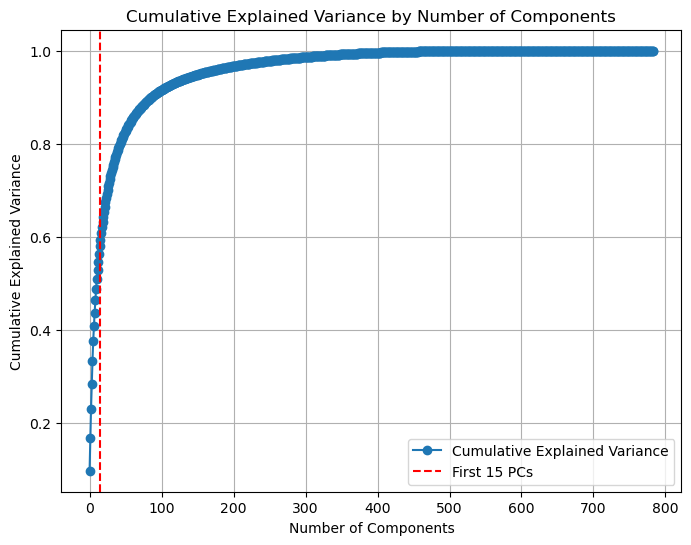

In [17]:
# 绘制累积解释方差图
plt.figure(figsize=(8, 6))
plt.plot(cumulative_variance_ratio, 'o-', label='Cumulative Explained Variance')
plt.axvline(x=14, color='r', linestyle='--', label='First 15 PCs')
plt.title('Cumulative Explained Variance by Number of Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.legend()
plt.grid(True)
plt.show()

In [18]:
text = "Связь между собственными значениями и дисперсией данных: собственные значения на самом деле являются собственными значениями ковариационной матрицы, которые представляют собой дисперсию данных в этом направлении. Чем больше собственное значение, тем выше дисперсия данных в этом направлении, то есть тем больше дисперсия в этом направлении.Цель PCA - найти те направления, которые максимизируют дисперсию данных, то есть главные компоненты."
print(text)

Связь между собственными значениями и дисперсией данных: собственные значения на самом деле являются собственными значениями ковариационной матрицы, которые представляют собой дисперсию данных в этом направлении. Чем больше собственное значение, тем выше дисперсия данных в этом направлении, то есть тем больше дисперсия в этом направлении.Цель PCA - найти те направления, которые максимизируют дисперсию данных, то есть главные компоненты.


In [19]:
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

class my_kNN:
    def __init__(self, n_neighbors):
        self.n_neighbors = n_neighbors
    
    def fit(self, X, y):
        self.X_train = X
        self.y_train = y
    
    def _euclidean_distance(self, x1, x2):
        return np.sqrt(np.sum((x1 - x2)**2))
    
    def predict(self, X):
        y_pred = [self._predict(x) for x in X]
        return np.array(y_pred)
    
    def _predict(self, x):
        distances = [self._euclidean_distance(x, x_train) for x_train in self.X_train]
        k_indices = np.argsort(distances)[:self.n_neighbors]
        k_nearest_labels = [self.y_train[i] for i in k_indices]
        most_common = np.bincount(k_nearest_labels).argmax()
        return most_common

In [20]:
# 提取训练集图像和标签
X_train, y_train = train[0], train[1]

# 提取验证集图像和标签
X_val, y_val = validation[0], validation[1]

# 提取测试集图像和标签
X_test, y_test = test[0], test[1]

In [21]:
# 按照 2:8 的比例划分训练集
test_size = 0.2  # 测试集占 20%
random_state = 42

# 划分训练集
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(
    X_train, y_train, test_size=test_size, random_state=random_state
)

# 输出划分后的数据集大小
print(f"X_train_2 shape: {X_train_2.shape}")
print(f"y_train_2 shape: {y_train_2.shape}")
print(f"X_test_2 shape: {X_test_2.shape}")
print(f"y_test_2 shape: {y_test_2.shape}")

X_train_2 shape: (44000, 28, 28, 1)
y_train_2 shape: (44000,)
X_test_2 shape: (11000, 28, 28, 1)
y_test_2 shape: (11000,)


In [22]:
from sklearn.neighbors import KNeighborsClassifier
# 创建 k-最近邻分类器
num_neighbors = 5
my_kNN = KNeighborsClassifier(n_neighbors=num_neighbors)

# 训练分类器
my_kNN.fit(X_train_2.reshape(X_train_2.shape[0], -1), y_train_2)

# 预测
y_pred = my_kNN.predict(X_test_2.reshape(X_test_2.shape[0], -1))

# 计算准确率
accuracy = accuracy_score(y_test_2, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 96.70%


In [37]:
from sklearn.decomposition import PCA
# 初始化PCA
max_components = min(X_train_2.shape[1], X_train_2.shape[2])  # 假设数据是二维或三维的
best_accuracy = 0
best_components = 1
best_neighbors = 1
accuracies = []  # 初始化 accuracies 列表
best_neighbors_list = []  # 记录每个主成分数量下的最佳邻居数

for n_components in range(1, max_components + 1):
    # 应用PCA
    pca = PCA(n_components=n_components)
    X_train_pca = pca.fit_transform(X_train_2.reshape(X_train_2.shape[0], -1))
    X_test_pca = pca.transform(X_test_2.reshape(X_test_2.shape[0], -1))
    
    # 尝试不同的邻居数量
    for num_neighbors in range(1, 31):
        # 创建k-最近邻分类器
        knn = KNeighborsClassifier(n_neighbors=num_neighbors)
        
        # 训练分类器
        knn.fit(X_train_pca, y_train_2)
        
        # 预测并计算准确率
        y_pred = knn.predict(X_test_pca)
        accuracy = accuracy_score(y_test_2, y_pred)
        
        # 更新最佳参数和精度
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_components = n_components
            best_neighbors = num_neighbors
            
    accuracies.append(best_accuracy)  # 更新 accuracies 列表
    best_neighbors_list.append(best_neighbors)  # 记录每个主成分数量下的最佳邻居数
            
    print(f"PCA components: {n_components}, Best accuracy so far: {best_accuracy * 100:.2f}%")
    
print(f"\nBest parameters: Components={best_components}, Neighbors={best_neighbors}, Accuracy={best_accuracy * 100:.2f}%")

PCA components: 1, Best accuracy so far: 28.62%
PCA components: 2, Best accuracy so far: 44.30%
PCA components: 3, Best accuracy so far: 50.71%
PCA components: 4, Best accuracy so far: 65.15%
PCA components: 5, Best accuracy so far: 75.63%
PCA components: 6, Best accuracy so far: 83.78%
PCA components: 7, Best accuracy so far: 87.58%
PCA components: 8, Best accuracy so far: 90.26%
PCA components: 9, Best accuracy so far: 91.61%
PCA components: 10, Best accuracy so far: 93.12%
PCA components: 11, Best accuracy so far: 93.80%
PCA components: 12, Best accuracy so far: 94.68%
PCA components: 13, Best accuracy so far: 95.35%
PCA components: 14, Best accuracy so far: 95.78%
PCA components: 15, Best accuracy so far: 95.83%
PCA components: 16, Best accuracy so far: 96.40%
PCA components: 17, Best accuracy so far: 96.55%
PCA components: 18, Best accuracy so far: 96.71%
PCA components: 19, Best accuracy so far: 96.82%
PCA components: 20, Best accuracy so far: 96.97%
PCA components: 21, Best accu

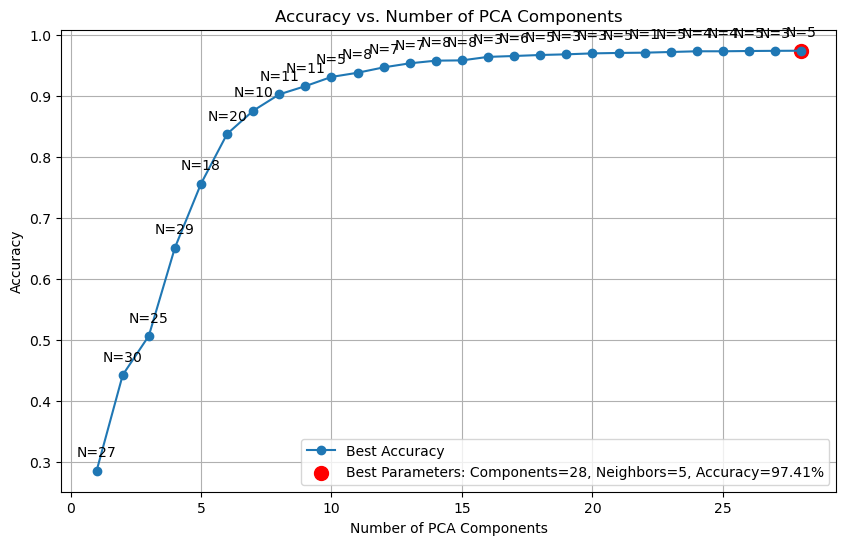

In [39]:
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# 绘制图表
plt.figure(figsize=(10, 6))
plt.plot(range(1, max_components + 1), accuracies, marker='o', linestyle='-', label='Best Accuracy')
plt.scatter(best_components, best_accuracy, color='red', s=100, label=f'Best Parameters: Components={best_components}, Neighbors={best_neighbors}, Accuracy={best_accuracy * 100:.2f}%')

# 添加邻居数的标注
for i, neighbors in enumerate(best_neighbors_list):
    plt.annotate(f'N={neighbors}', (i + 1, accuracies[i]), textcoords="offset points", xytext=(0,10), ha='center')

plt.xlabel('Number of PCA Components')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Number of PCA Components')
plt.legend()
plt.grid(True)
plt.show()